In [ ]:
#Please check the dataset in the below google drive since dataset was too big it was creating issue in git 
#so kept the dataset in the google drive under shared folder 
# https://drive.google.com/file/d/1BLmkNYpdCWW8d-rUH57WMH1eMUcC06D9/view?usp=drive_link


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 1. CAPSTONE Two -  Loading & Cleaning Part

In [7]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import os
#from library.sb_utils import save_file



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

import os

from library.sb_utils import save_file

In [9]:
fraud_data = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone2/fraudTrain.csv')


In [5]:
#Call the info method  to see a summary of the data
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Index                  1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [11]:
#Call the head method to print the first several rows of the data
fraud_data.head()

,Index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
fraud_data.drop(fraud_data.columns[:1], axis=1, inplace=True)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
#converting trans_date_trans_time into datetime
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
print(fraud_data.dtypes['trans_date_trans_time'])
fraud_data.head()

datetime64[ns]


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
#dtypes of the columns
fraud_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [19]:
#number of unique values in the dataset
fraud_data.nunique()

trans_date_trans_time     476595
cc_num                       320
merchant                     693
category                      14
amt                        48602
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
lat                          950
long                         951
city_pop                     865
job                          493
dob                          950
trans_num                1048575
unix_time                1030650
merch_lat                1016437
merch_long               1034825
is_fraud                       2
dtype: int64

In [21]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
fraud_data['trans_hour'] = fraud_data['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
fraud_data['trans_day_of_week'] = fraud_data['trans_date_trans_time'].dt.dayofweek + 1
fraud_data['trans_day_of_week'] = fraud_data['trans_day_of_week'].astype(int)
#deriving 'year_month'
fraud_data['trans_year_month'] = fraud_data['trans_date_trans_time'].dt.to_period('M')

fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month
0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01
1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01
2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01
3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01
4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01


In [23]:
#Getting the Age of a coustomer from the Date of Birth column
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['age'] = ((fraud_data['trans_date_trans_time'] - fraud_data['dob']).dt.days / 365.25).astype(int)

fraud_data['age'].head()

0    30
1    40
2    56
3    51
4    32
Name: age, dtype: int64

In [25]:
#dropping variables which are not usefull for the Visualization and analytics
fraud_data.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
fraud_data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01,30
1,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01,40
2,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01,56
3,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01,51
4,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01,32


In [27]:
#checking the dataset info
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  object   
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  object   
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [29]:
#converting data types that should be categorical into "category"

fraud_data['category'] = fraud_data['category'].astype('category')
fraud_data['gender'] = fraud_data['gender'].astype('category')
fraud_data['is_fraud'] = fraud_data['is_fraud'].astype('category')

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  category 
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  category 
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [31]:
#determing the shape of the dataset
fraud_data.shape

(1048575, 22)

In [33]:
#describing the dataset
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [25]:
# scientific notation values
#fraud_data['amt'] = fraud_data['amt'].apply(lambda x: '{:.6f}'.format(x))

In [35]:
#describing the dataset
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [37]:
fraud_data['amt'] = pd.to_numeric(fraud_data['amt'], errors='coerce')

In [39]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [41]:
fraud_data['cc_num'] = pd.to_numeric(fraud_data['cc_num'], errors='coerce')

In [43]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [45]:
# Step 2: Format the column to six decimal places (display only)
fraud_data['cc_num'] = fraud_data['cc_num'].apply(lambda x: '{:.6f}'.format(x) if pd.notnull(x) else x)

# Optional: Convert back to float if needed
fraud_data['cc_num'] = fraud_data['cc_num'].astype(float)

In [47]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [49]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  category 
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  category 
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [51]:
fraud_data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01,30
1,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01,40
2,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01,56
3,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01,51
4,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01,32


In [53]:
#Temporarily Disable Scientific Notation for Display
with pd.option_context('display.float_format', '{:.6f}'.format):
    display(fraud_data.head())

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01,30
1,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01,40
2,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01,56
3,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01,51
4,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01,32


In [55]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [57]:
# Temporarily set global float format to display all values in standard decimal notation
pd.options.display.float_format = '{:,.0f}'.format  # No decimal places, standard notation

# Run `describe()` to view without scientific notation
print(fraud_data.describe())

# Reset to default to avoid affecting other outputs
#pd.reset_option('display.float_format')

                         cc_num       amt       zip       lat      long  \
count                 1,048,575 1,048,575 1,048,575 1,048,575 1,048,575   
mean    417,179,950,519,735,232        70    48,802        39       -90   
std   1,308,892,727,783,561,216       160    26,898         5        14   
min              60,416,207,185         1     1,257        20      -166   
25%         180,000,000,000,000        10    26,237        35       -97   
50%       3,520,000,000,000,000        47    48,174        39       -87   
75%       4,640,000,000,000,000        83    72,042        42       -80   
max   4,990,000,000,000,000,000    28,949    99,783        67       -68   

       city_pop     unix_time  merch_lat  merch_long  trans_hour  \
count 1,048,575     1,048,575  1,048,575   1,048,575   1,048,575   
mean     89,058 1,344,905,833         39         -90          13   
std     302,435    10,196,997          5          14           7   
min          23 1,325,376,018         19        -167

In [59]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,"1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575"
mean,"417,179,950,519,735,232",70,"48,802",39,-90,"89,058","1,344,905,833",39,-90,13,4,45
std,"1,308,892,727,783,561,216",160,"26,898",5,14,"302,435","10,196,997",5,14,7,2,17
min,"60,416,207,185",1,"1,257",20,-166,23,"1,325,376,018",19,-167,0,1,13
25%,"180,000,000,000,000",10,"26,237",35,-97,743,"1,336,682,353",35,-97,7,2,32
50%,"3,520,000,000,000,000",47,"48,174",39,-87,"2,456","1,344,901,521",39,-87,14,4,43
75%,"4,640,000,000,000,000",83,"72,042",42,-80,"20,328","1,354,366,012",42,-80,19,6,56
max,"4,990,000,000,000,000,000","28,949","99,783",67,-68,"2,906,700","1,362,931,730",68,-67,23,7,95


In [61]:
# Set global float format to standard decimal notation without commas
pd.options.display.float_format = '{:.0f}'.format  # No decimal places, no commas

# Display the `describe()` output
print(fraud_data.describe())

                   cc_num     amt     zip     lat    long  city_pop  \
count             1048575 1048575 1048575 1048575 1048575   1048575   
mean   417179950519735232      70   48802      39     -90     89058   
std   1308892727783561216     160   26898       5      14    302435   
min           60416207185       1    1257      20    -166        23   
25%       180000000000000      10   26237      35     -97       743   
50%      3520000000000000      47   48174      39     -87      2456   
75%      4640000000000000      83   72042      42     -80     20328   
max   4990000000000000000   28949   99783      67     -68   2906700   

       unix_time  merch_lat  merch_long  trans_hour  trans_day_of_week     age  
count    1048575    1048575     1048575     1048575            1048575 1048575  
mean  1344905833         39         -90          13                  4      45  
std     10196997          5          14           7                  2      17  
min   1325376018         19        -

In [63]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,417179950519735232,70,48802,39,-90,89058,1344905833,39,-90,13,4,45
std,1308892727783561216,160,26898,5,14,302435,10196997,5,14,7,2,17
min,60416207185,1,1257,20,-166,23,1325376018,19,-167,0,1,13
25%,180000000000000,10,26237,35,-97,743,1336682353,35,-97,7,2,32
50%,3520000000000000,47,48174,39,-87,2456,1344901521,39,-87,14,4,43
75%,4640000000000000,83,72042,42,-80,20328,1354366012,42,-80,19,6,56
max,4990000000000000000,28949,99783,67,-68,2906700,1362931730,68,-67,23,7,95


In [65]:
# Set global float format to six decimal places without scientific notation
pd.options.display.float_format = '{:.6f}'.format  # Six decimal places, standard notation

# Display the `describe()` output
print(fraud_data.describe())

                          cc_num            amt            zip            lat  \
count             1048575.000000 1048575.000000 1048575.000000 1048575.000000   
mean   417179950519735232.000000      70.279095   48801.590604      38.533364   
std   1308892727783561216.000000     159.951841   26898.040351       5.076852   
min           60416207185.000000       1.000000    1257.000000      20.027100   
25%       180000000000000.000000       9.640000   26237.000000      34.620500   
50%      3520000000000000.000000      47.450000   48174.000000      39.354300   
75%      4640000000000000.000000      83.050000   72042.000000      41.940400   
max   4990000000000000000.000000   28948.900000   99783.000000      66.693300   

                long       city_pop         unix_time      merch_lat  \
count 1048575.000000 1048575.000000    1048575.000000 1048575.000000   
mean      -90.226256   89057.759063 1344905832.778656      38.533463   
std        13.758582  302435.057620   10196997.483775 

In [ ]:
#2. CAPSTONE Two - EDA part

In [67]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,12.800773,4.135594,45.386577
std,1308892727783561216.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,6.816861,2.200499,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,1.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,7.000000,2.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,14.000000,4.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,19.000000,6.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,23.000000,7.000000,95.000000


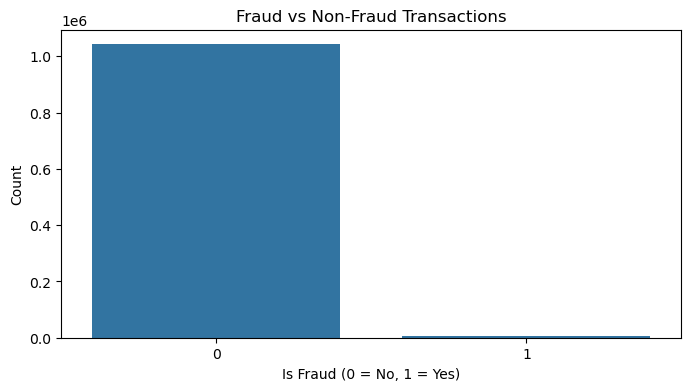

is_fraud
0   99.427223
1    0.572777
Name: proportion, dtype: float64


In [69]:
#Fraud vs. Non-Fraud Transactions

plt.figure(figsize=(8,4))
sns.countplot(x=fraud_data['is_fraud'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Check exact percentage
fraud_percentage = fraud_data['is_fraud'].value_counts(normalize=True) * 100
print(fraud_percentage)

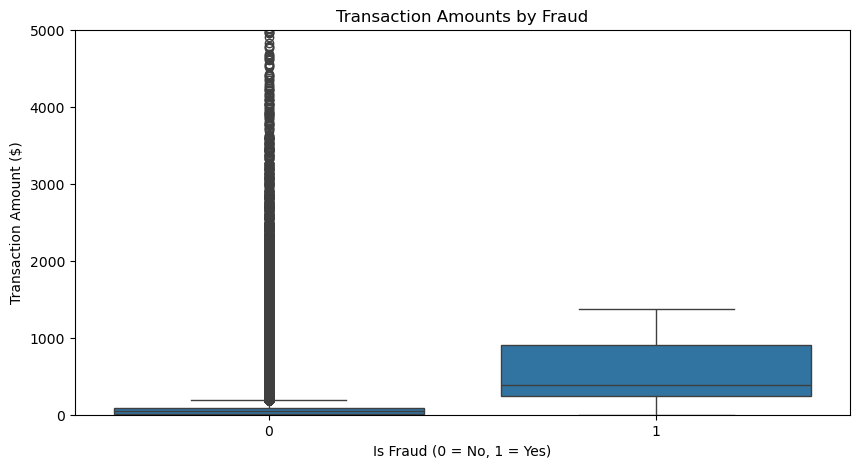

In [71]:
#Fraud Transactions by Amount
plt.figure(figsize=(10,5))
sns.boxplot(x=fraud_data['is_fraud'], y=fraud_data['amt'])
plt.ylim(0, 5000)  # Limit max amount for better visualization
plt.title("Transaction Amounts by Fraud")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount ($)")
plt.show()

In [73]:
print(fraud_data.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age'],
      dtype='object')


In [75]:
fraud_data['trans_date'] = pd.to_datetime(fraud_data['unix_time'], unit='s')


In [77]:
print(fraud_data.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age', 'trans_date'],
      dtype='object')


In [79]:
print(fraud_data.dtypes)

cc_num                      float64
merchant                     object
category                   category
amt                         float64
gender                     category
street                       object
city                         object
state                        object
zip                           int64
lat                         float64
long                        float64
city_pop                      int64
job                          object
trans_num                    object
unix_time                     int64
merch_lat                   float64
merch_long                  float64
is_fraud                   category
trans_hour                    int32
trans_day_of_week             int64
trans_year_month          period[M]
age                           int64
trans_date           datetime64[ns]
dtype: object


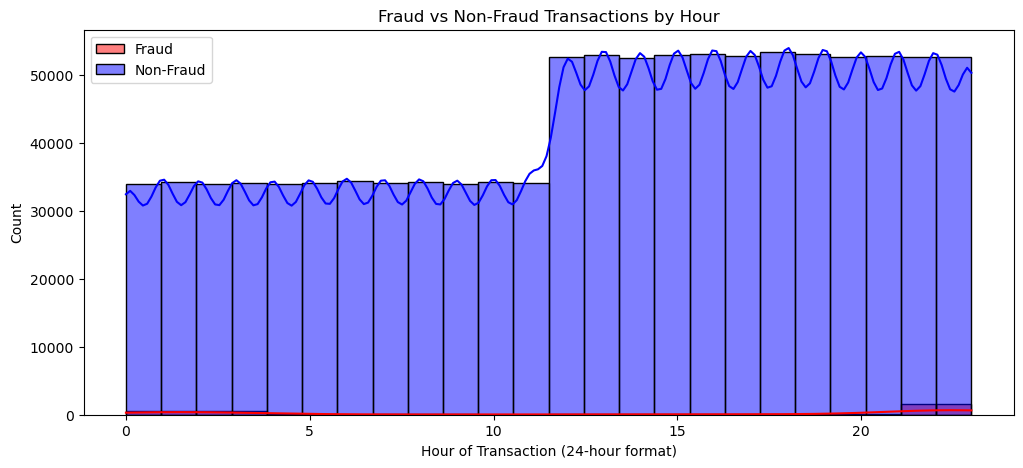

In [81]:
#Fraud vs Non-Fraud by Transaction Time
fraud_data['trans_hour'] = fraud_data['trans_date'].dt.hour  # Extract transaction hour

plt.figure(figsize=(12,5))
sns.histplot(fraud_data[fraud_data['is_fraud'] == 1]['trans_hour'], bins=24, color='red', label="Fraud", kde=True)
sns.histplot(fraud_data[fraud_data['is_fraud'] == 0]['trans_hour'], bins=24, color='blue', label="Non-Fraud", kde=True)
plt.title("Fraud vs Non-Fraud Transactions by Hour")
plt.xlabel("Hour of Transaction (24-hour format)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
#Expalnation

This graph compares the distribution of fraudulent and non-fraudulent transactions across different hours of the day.

1.Non-Fraudulent Transactions (Blue):
    Non-fraudulent transactions are distributed evenly across the day, with a noticeable increase after 9 AM and peaking throughout the afternoon and evening.
    This reflects typical consumer behavior, as most people perform transactions during regular waking and business hours.

2.Fraudulent Transactions (Red):
   Fraudulent transactions show a much lower count compared to non-fraudulent transactions.
   Fraudulent activity slightly mirrors non-fraudulent behavior but is spread across all hours.
   A minor peak in fraudulent transactions aligns with the business hours of 9 AM to 5 PM, indicating fraudsters may exploit busy hours to go unnoticed.

3.Transaction Patterns by Time:
    Early morning hours (12 AM - 5 AM):
        Lower transaction volumes overall, as these are non-peak hours.
        Fraudulent transactions during this time may indicate automated or international fraud attempts.
    Daytime hours (9 AM - 5 PM):
        Higher transaction volumes, with fraudulent and non-fraudulent activities peaking together.
        Indicates fraudsters mimic legitimate behavior during high transaction times to blend in.

4.Fraud-to-Non-Fraud Ratio:
   The red bars (fraud) are consistently much smaller than the blue bars (non-fraud), 
   highlighting the imbalance in fraud detection datasets.



In [115]:
#fraud_data['category'] = fraud_data['category'].astype(str)


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_80987/3694097944.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_category = fraud_data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)


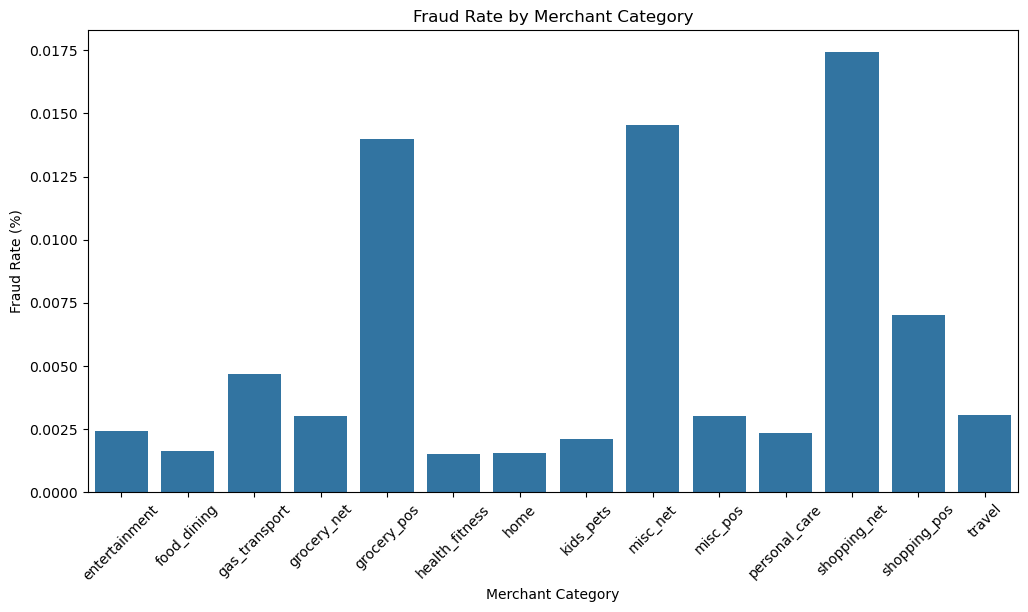

In [83]:
#Fraud Rate per Merchant Category

fraud_data['is_fraud'] = fraud_data['is_fraud'].astype(float)  # Convert to float

fraud_by_category = fraud_data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values)
plt.xticks(rotation=45)
plt.title("Fraud Rate by Merchant Category")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Merchant Category")
plt.show()




In [ ]:
#Expalnation

"fraud rate for each merchant category"


1.Top Fraud-Prone Categories:

  shopping_net:
     This category has the highest fraud rate.
     Online shopping platforms are often targeted due to the ease of exploiting stolen payment methods.
  misc_net:
      Miscellaneous online transactions also show high fraud rates, likely due to diverse and less regulated transactions.

2. Moderately Fraud-Prone Categories:

    grocery_pos:
        Physical grocery stores are moderately affected, possibly due to fraudulent in-person transactions.
    shopping_pos:
        In-person shopping transactions show moderate fraud rates, as fraudsters may use stolen credit cards in physical retail stores.

3.Low Fraud Categories:

    health_fitness, home, and food_dining:
         These categories have the lowest fraud rates, possibly because:
         Health and fitness services are often subscription-based, requiring verified payment methods.
         Fraudsters may not target smaller, specific categories like food or home-related purchases.




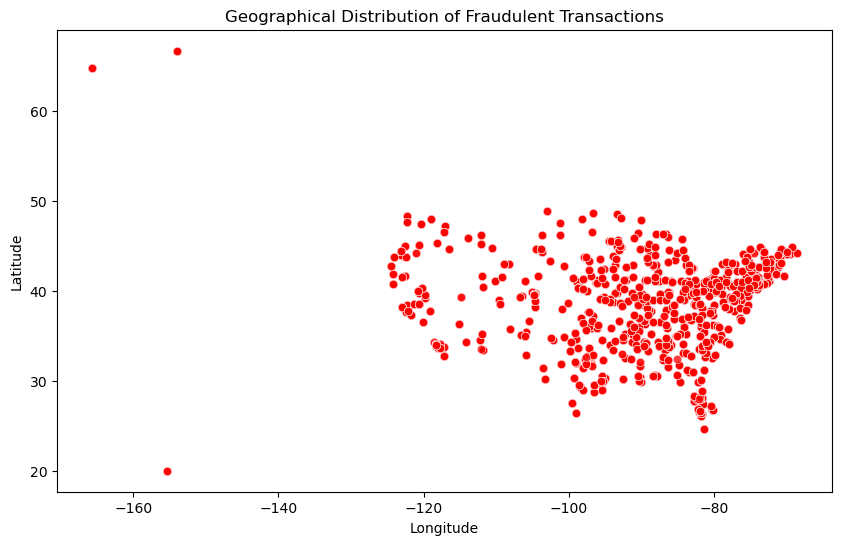

In [85]:
#Fraud Distribution by Location

plt.figure(figsize=(10,6))
sns.scatterplot(x=fraud_data[fraud_data['is_fraud'] == 1]['long'],
                y=fraud_data[fraud_data['is_fraud'] == 1]['lat'],
                alpha=0.5, color='red')
plt.title("Geographical Distribution of Fraudulent Transactions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Expalnation 

"Geographical Distribution of Fraudulent Transactions"

1.Concentration of Fraud in the United States:
Most fraudulent transactions are clustered in areas within the mainland US, especially on the East Coast.
This indicates higher fraud activity in densely populated or economically active regions.

2.Sparse Points Outside the Mainland:

   Few fraudulent transactions are far from the main cluster:
          Hawaii/Alaska regions around latitude > 50 and longitude < -150.
          A point near the southernmost latitudes (latitude ~20), likely representing fraud in Hawaii.

3.Lack of Fraud in Central or Western Regions:
Central regions of the US appear to have relatively less fraud activity, possibly due to lower population density or fewer transactions.


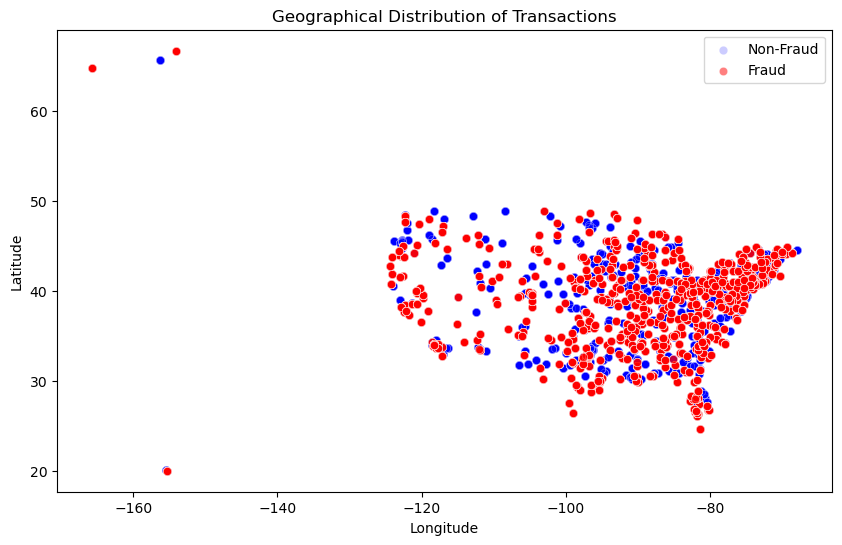

In [87]:
# Plot Both Fraud & Non-Fraud Transactions for Comparison

plt.figure(figsize=(10,6))

# Plot non-fraud transactions in blue
sns.scatterplot(x=fraud_data[fraud_data['is_fraud'] == 0]['long'],
                y=fraud_data[fraud_data['is_fraud'] == 0]['lat'],
                alpha=0.2, color='blue', label="Non-Fraud")

# Plot fraud transactions in red
sns.scatterplot(x=fraud_data[fraud_data['is_fraud'] == 1]['long'],
                y=fraud_data[fraud_data['is_fraud'] == 1]['lat'],
                alpha=0.5, color='red', label="Fraud")

plt.title("Geographical Distribution of Transactions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [ ]:
#Expalnation

Fraud Distribution:

1.Fraudulent transactions (red points) are highly concentrated along the East Coast and densely populated areas.
Sparse fraud activity is observed in Alaska, Hawaii, and low-population regions.

2.Non-Fraud Distribution:

Non-fraud transactions (blue points) are spread more uniformly across the country, including regions where fraud is less common.
Certain areas have a mix of both fraud and non-fraud, indicating fraud might target high-transaction zones.

3.Overlap Regions:

Regions with both red and blue points suggest fraudulent transactions may mimic normal activity, 
requiring further investigation into those areas

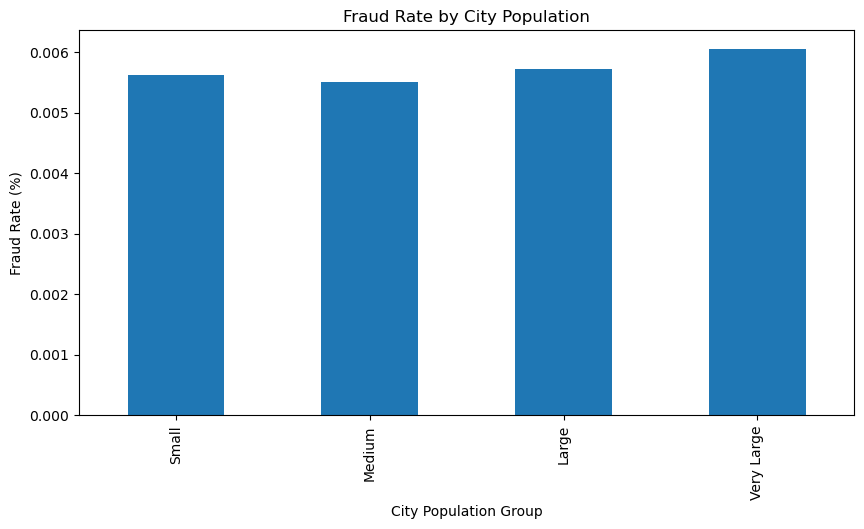

In [89]:
#Fraud Rate by City Population

fraud_data['city_pop_group'] = pd.qcut(fraud_data['city_pop'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

#fraud_by_city = fraud_data.groupby('city_pop_group')['is_fraud'].mean()
fraud_by_city = fraud_data.groupby('city_pop_group', observed=False)['is_fraud'].mean()

plt.figure(figsize=(10,5))
fraud_by_city.plot(kind='bar', title="Fraud Rate by City Population")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("City Population Group")
plt.show()

In [ ]:
# Explanation 

pd.qcut: Divides the city populations into 4 quartiles (equal-sized groups based on distribution):

Small: Cities in the lowest 25% of population.
Medium: Cities in the 25-50% range.
Large: Cities in the 50-75% range.
Very Large: Cities in the top 25%.
Labels: Assigns descriptive labels to each group.


Fraud Rate by City Population Group bar chart provides clear insight into how fraud varies across city sizes. 

1. Fraud Rate is Slightly Higher in Very Large Cities:
      Cities with the largest populations (e.g., major metropolitan areas) tend to have a marginally higher fraud rate.
      This may be due to:
            High transaction volumes, giving fraudsters more opportunities.
            A higher likelihood of targeting dense urban areas where commerce is more frequent.

2.Fraud Rate in Smaller Cities:
   
   Small and medium cities have lower fraud rates.
   Reasons could include:
       Lower transaction volumes, making it easier to detect anomalies.
        Fewer high-value targets for fraudsters.

3.Similar Fraud Rates Across Groups:
The differences between groups are not extreme, indicating that fraud occurs consistently across various population sizes, 
albeit slightly higher in very large cities.


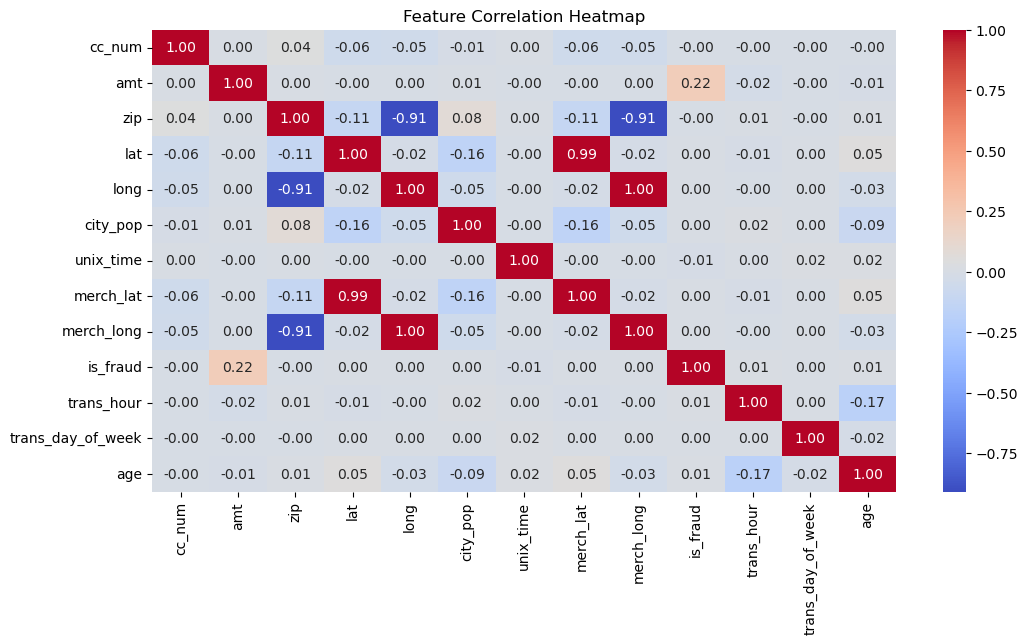

In [91]:
#Correlation Between Features

# Select only numeric columns
numeric_cols = fraud_data.select_dtypes(include=['number'])

# Compute correlations for numeric columns only
plt.figure(figsize=(12,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
#Explanation

The heatmap displays the Pearson correlation coefficients between the numeric features in your dataset. 
Correlation values range from -1 to 1.

1 or -1: Perfect positive or negative correlation.
0: No correlation


1.Strong Positive Correlations:

lat (latitude) and merch_lat (merchant latitude): Correlation = 0.99
    Indicates that the transaction location (lat) and merchant location (merch_lat) are almost identical, 
    likely because most transactions occur locally.
long (longitude) and merch_long (merchant longitude): Correlation = 0.99
    Similar to lat, this shows that transaction and merchant locations are closely tied.

2.Moderate Positive Correlation:
amt (transaction amount) and is_fraud (fraud): Correlation = 0.22
   Suggests that higher transaction amounts are moderately linked to fraud. Fraudsters may target higher-value transactions more often.

3.Strong Negative Correlations:

zip and long/merch_long: Correlation = -0.91
     Indicates that geographic regions (zip code) and longitude are inversely related, likely due to regional location coding.

4.Weak Correlations with is_fraud:
Most features, such as lat, long, city_pop, and trans_hour, show little to no correlation with fraud. 
This suggests that fraud detection requires combining multiple features rather than relying on individual ones.


In [ ]:
#3. CAPSTONE Two -  Preprocessing and Training Data Development part

In [ ]:
# Based on the instruction ,in this part of capstone project we will perform below steps :

1. Handle Categorical Features:
   We need to create dummy (indicator) variables for categorical columns using pd.get_dummies().
   
   Categorical Features in Data:
         category (Merchant Category)
         gender (Customer Gender)
         state (Transaction State)
   We will:
          Use One-Hot Encoding for category, gender, and state.
Drop one level to avoid multicollinearity.
                              
2. Standardize Numeric Features:
   Some numeric features have different scales (e.g., amt vs. city_pop), which can negatively impact models. We will use StandardScaler to scale them.

   Numerical Features to Standardize:
         amt (Transaction Amount)
         city_pop (City Population)
         age (Customer Age)
         trans_hour (Transaction Time)
         lat, long, merch_lat, merch_long (Geolocation)
                              
3. Split Data into Training & Testing Sets

   We will:

      Split the dataset into 80% training and 20% testing.
      Further split 10% from training for validation.
      Use train_test_split() with stratification to maintain fraud ratio.
                              
Observation: 
Based on th graph under "Fraud vs. Non-Fraud Transactions" it looks like 

99.43% of transactions are non-fraudulent (0)
Only 0.57% of transactions are fraudulent (1)

This is a severely imbalanced dataset, meaning most models will likely predict "Non-Fraud" in all cases, 
leading to poor fraud detection performance.

Do We Need SMOTE (Synthetic Minority Oversampling Technique)?
YES! Since fraudulent transactions are extremely underrepresented, we must use oversampling techniques like SMOTE to:

Generate synthetic fraudulent transactions to balance the dataset.
Prevent the model from being biased toward predicting "Non-Fraud".
Improve recall (sensitivity) for fraud detection

4. Handle Imbalanced Data (Fraud Cases)
   Fraud is rare compared to non-fraud, which can bias the model.
   We will use:

   SMOTE (Synthetic Minority Oversampling Technique) to oversample fraudulent transactions.

In [93]:
#Preprocessin - 1
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Create Dummy Variables for Categorical Features
fraud_data_encoded = pd.get_dummies(fraud_data, columns=['category', 'gender', 'state'], drop_first=True)

# Step 2: Define Numerical and Target Features
numerical_features = ['amt', 'city_pop', 'age', 'trans_hour', 'lat', 'long', 'merch_lat', 'merch_long']
target = 'is_fraud'

# Step 3: Train-Test Split (80% Train, 20% Test)
X = fraud_data_encoded.drop(columns=[target])
y = fraud_data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split 10% from training for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Step 4: Standardize Numeric Features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display Preprocessed Training Data
print("Preprocessed Training Data Sample:")
print(pd.concat([X_train, y_train], axis=1).head())


Preprocessed Training Data Sample:
                        cc_num                                merchant  \
719109 3580000000000000.000000                          fraud_Jast Ltd   
281743  342000000000000.000000  fraud_Johnson, Runolfsdottir and Mayer   
719263 2480000000000000.000000     fraud_Reinger, Weissnat and Strosin   
212219  345000000000000.000000                         fraud_Boyer PLC   
674090 2290000000000000.000000                   fraud_Vandervort-Funk   

             amt                           street           city    zip  \
719109  0.077376                  919 Miller Isle       Williams  47470   
281743 -0.128360          304 Ryan Port Suite 335         Camden  64017   
719263 -0.078832  153 Mccullough Springs Apt. 857      Lamberton  56152   
212219  0.381655            2924 Bobby Trafficway        Sebring  33872   
674090  0.679079            6278 Stephanie Unions  New York City  10039   

             lat      long  city_pop                       job  ... s

In [ ]:
Observations on the Data Preprocessing Steps

1.Encoding Categorical Features
One-Hot Encoding (OHE) is applied to categorical features (category, gender, state).
    drop_first=True removes one category per variable to prevent multicollinearity.
    Ensures the model works with numerical data only, as ML models don’t handle categorical data well.
    Potential Issue:

The merchant column is still categorical (e.g., fraud_Jast Ltd).
Consider removing or encoding merchant using frequency encoding or target encoding.

2.Defining Features and Target Variable
      Features (X) and Target (y) are correctly defined.
      Feature Engineering:amt, city_pop, age, and geolocation (lat, long, merch_lat, merch_long) are kept as numeric.
      Potential Issue: cc_num (credit card number) is not a useful feature as it doesn’t provide predictive value.

3.Train-Test Split (80% Train, 20% Test)
  First Split: 80% training, 20% testing.
  Stratify=y ensures the fraud vs. non-fraud ratio remains consistent across splits.
  Second Split:10% of the training set is used as validation for hyperparameter tuning.
  Final Data Distribution:
       Training: 72%
       Validation: 8%
       Test: 20%
4. Standardizing Numeric Features
Standardization ensures numeric values are scaled to a mean of 0 and variance of 1.
   Improves model convergence, especially for algorithms sensitive to feature magnitudes (e.g., Logistic Regression, SVM).
   Proper Data Leakage Prevention:

  fit_transform() applied only to training data.
  transform() applied to validation and test sets to avoid data leakage.

5. Displaying Preprocessed Data
   The printed sample shows:

Dummy-encoded categorical features (state_TX, state_WA, etc.).
Standardized numerical features (amt, lat, long, etc.).
Potential Issue:
merchant column is still present.
Consider removing or encoding it properly.
    

In [ ]:
#SMOTE - Not using SMOTE because it interpolates new synthetic data, which may not always preserve relationships between categorical variables. 
#This can introduce data leakage and distort feature distributions, especially if the categorical encoding relies on ordinal relationships.

In [ ]:
# Used Stratified K-Fold Cross-Validation 


By using Stratified K-Fold Cross-Validation, ensuring that each fold maintains the same class distribution as the original dataset. 
This means that in every fold, the proportion of fraud vs. non-fraud cases remains approximately the same, 
which helps prevent bias introduced by imbalanced data. Instead of generating synthetic samples (like in SMOTE), 
this technique preserves the original data and ensures fair training and evaluation.

Key Benefits:

Prevents overfitting (which can happen with SMOTE due to synthetic data).
Maintains realistic distributions, improving the model’s ability to generalize.
Ensures that each training set sees a similar proportion of fraud cases, leading to consistent performance across folds

In [95]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [97]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through folds and check distribution
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print(f"Fold {fold} - Class Distribution:")
    print("Train Data:", dict(Counter(y_train)))
    print("Test Data:", dict(Counter(y_test)))
    print("-" * 40)


Fold 1 - Class Distribution:
Train Data: {0.0: 834055, 1.0: 4805}
Test Data: {0.0: 208514, 1.0: 1201}
----------------------------------------
Fold 2 - Class Distribution:
Train Data: {0.0: 834055, 1.0: 4805}
Test Data: {0.0: 208514, 1.0: 1201}
----------------------------------------
Fold 3 - Class Distribution:
Train Data: {0.0: 834055, 1.0: 4805}
Test Data: {0.0: 208514, 1.0: 1201}
----------------------------------------
Fold 4 - Class Distribution:
Train Data: {0.0: 834055, 1.0: 4805}
Test Data: {0.0: 208514, 1.0: 1201}
----------------------------------------
Fold 5 - Class Distribution:
Train Data: {0.0: 834056, 1.0: 4804}
Test Data: {0.0: 208513, 1.0: 1202}
----------------------------------------


In [ ]:
Observations
Consistency Across Folds:
Each fold maintains almost the same ratio of class 0 (non-fraud) and class 1 (fraud).

Example:
Train Data: {0.0: 834055, 1.0: 4805}
Test Data: {0.0: 208514, 1.0: 1201}
This pattern repeats for all 5 folds.

Class Imbalance:
The dataset is highly imbalanced (approx 0.5% fraud cases).
This could cause issues where the model overfits to the majority class (predicting mostly 0).

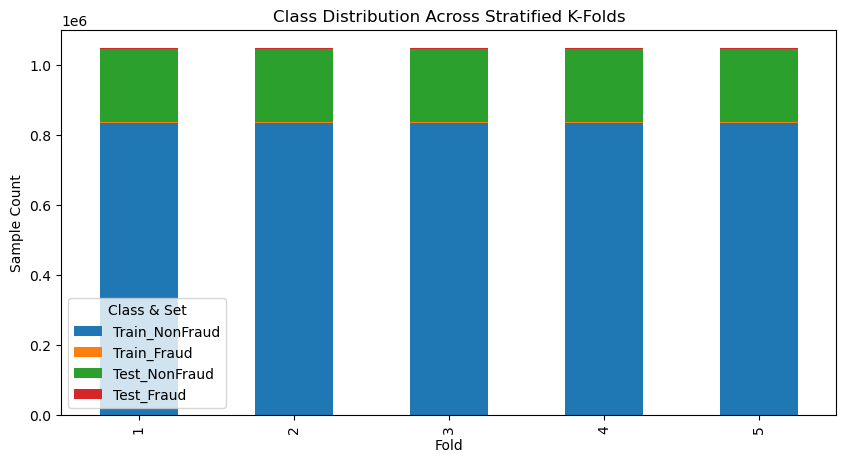

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Store fold distribution
folds_data = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    folds_data.append({
        'Fold': fold,
        'Train_NonFraud': (y_train == 0).sum(),
        'Train_Fraud': (y_train == 1).sum(),
        'Test_NonFraud': (y_test == 0).sum(),
        'Test_Fraud': (y_test == 1).sum(),
    })

# Convert to DataFrame
folds_df = pd.DataFrame(folds_data)

# Plot distribution
fig, ax = plt.subplots(figsize=(10, 5))
folds_df.set_index('Fold').plot(kind='bar', stacked=True, ax=ax)
plt.title("Class Distribution Across Stratified K-Folds")
plt.xlabel("Fold")
plt.ylabel("Sample Count")
plt.legend(title="Class & Set")
plt.show()


In [ ]:
Observations & Analysis of the Visualization
Balanced Stratification Across Folds 

The distribution of fraud (1) and non-fraud (0) samples remains consistent across all 5 folds.
Each bar (fold) has nearly the same proportions of classes.
Severe Class Imbalance 

The majority class (non-fraud) dominates the dataset (blue section).
The fraud cases (red and orange) are a tiny fraction, making up less than 1% of the total data.
Train-Test Split Consistency 

The train and test sets have similar distributions, meaning your stratified sampling is working properly.
This ensures that the model does not encounter a different class ratio in training vs. testing.
Potential Challenges for the Model 

Since fraud transactions are so rare, most models might bias towards predicting non-fraud transactions.
Accuracy alone will be misleading—other metrics like precision, recall, and F1-score will be crucial.


Summary
Your Stratified K-Fold implementation is correct.
The dataset is highly imbalanced, meaning the model might struggle to detect fraud.
Consider alternative techniques (like weighted models or threshold tuning) instead of SMOTE

In [101]:
print(X_train.select_dtypes(include=['object']).columns)


Index(['merchant', 'street', 'city', 'job', 'trans_num'], dtype='object')


In [103]:
#Step 1: Drop Irrelevant Columns
X_train = X_train.drop(columns=['trans_num'])
X_test = X_test.drop(columns=['trans_num'])


In [105]:
#Step 2: Encode Categorical Features
X_train = pd.get_dummies(X_train, columns=['street', 'city', 'job'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['street', 'city', 'job'], drop_first=True)

# Ensure Train and Test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [106]:
print(X_train.select_dtypes(include=['object']).columns)


Index(['merchant'], dtype='object')


In [109]:
print(X_train.dtypes.value_counts())


bool              2398
float64              6
int64                5
object               1
int32                1
period[M]            1
datetime64[ns]       1
category             1
Name: count, dtype: int64


In [111]:
if 'trans_date' in X_train.columns:
    X_train['trans_date'] = X_train['trans_date'].astype('int64')  # Convert datetime to numeric
    X_test['trans_date'] = X_test['trans_date'].astype('int64')


In [113]:
print(X_train.select_dtypes(include=['category']).columns)


Index(['city_pop_group'], dtype='object')


In [115]:
for col in X_train.select_dtypes(include=['category']).columns:
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].cat.codes


In [117]:
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes(include=['bool']).columns})


In [118]:
for col in X_train.select_dtypes(include=['datetime64[ns]']).columns:
    X_train[col] = X_train[col].astype('int64')
    X_test[col] = X_test[col].astype('int64')


In [121]:
for col in X_train.columns:
    if isinstance(X_train[col].dtype, pd.PeriodDtype):
        print(f"Column '{col}' has Period dtype")


Column 'trans_year_month' has Period dtype


In [123]:
X_train['trans_year_month'] = X_train['trans_year_month'].astype(str).str.replace('-', '').astype(int)
X_test['trans_year_month'] = X_test['trans_year_month'].astype(str).str.replace('-', '').astype(int)


In [125]:
print(X_train.dtypes.value_counts())


int64      2405
float64       6
object        1
int32         1
int8          1
Name: count, dtype: int64


In [127]:
#Steps to Fix:
# 1. Identify Non-Numeric Columns: Run the following to check for non-numeric columns in X_train:

print(X_train.select_dtypes(include=['object']).columns)



Index(['merchant'], dtype='object')


In [ ]:
# 2. Ensure All Categorical Variables Are Encoded:

If categorical variables like merchant, category, state, they must be encoded using pd.get_dummies() or LabelEncoder().
Since  error includes fraud_Kilback and Sons, it's likely that the merchant column has not been converted into numerical format.

In [129]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_sample = X_train.sample(frac=0.1, random_state=42)  
y_sample = y_train.loc[X_sample.index]


In [130]:
# 3. Check for Any Remaining Non-Numeric Features:

print(X_sample.dtypes.value_counts())  # Ensure all columns are numerical


int64      2405
bool        692
float64       6
int32         1
int8          1
Name: count, dtype: int64


In [131]:
# Convert Boolean Columns to Integers
X_sample = X_sample.astype({col: int for col in X_sample.select_dtypes(include=['bool']).columns})


In [132]:
from sklearn.ensemble import RandomForestClassifier

X_sample = X_train.sample(frac=0.1, random_state=42)  # Use 10% of training data
y_sample = y_train.loc[X_sample.index]

model = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42, n_jobs=-1)
model.fit(X_sample, y_sample)



RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
#3. CAPSTONE Two - Modeling

In [ ]:
#To move forward with the modeling step for fraud detection capstone project, below are some steps:

Step 1. Select Models for Comparison
                     
Best Three Models for Your Fraud Detection Capstone

     1. Random Forest – A strong ensemble method, good for handling imbalanced data (with class_weight='balanced').
     2. Logistic Regression – A simple, interpretable model that works well for classification.
     3. Support Vector Machine (SVM) – A powerful model that works well with imbalanced datasets when combined 
                                    with the class_weight='balanced' parameter.


Step 2. Implement Hyperparameter Tuning
To get the best performance, use GridSearchCV or RandomizedSearchCV for hyperparameter tuning. Parameters to tune include:

Random Forest: n_estimators, max_depth, min_samples_split
Logistic Regression: C (regularization strength)
                                                                   
Step 3  Evaluate Model Performance

After training, compare models using performance metrics:

Accuracy: Not the best for imbalanced datasets.
Precision: Measures how many predicted fraud cases are truly fraud.
Recall: Measures how well the model identifies actual fraud cases.
F1-Score: A balance between precision and recall.
AUC-ROC: Measures overall model performance.

Step 4. Select the Best Model
If  Random Forest performs best in F1-score and ROC-AUC, choose that.
If Logistic Regression is competitive, it might be preferred for interpretability and efficiency.
Consider computational cost and ease of deployment when selecting the final model.

                 

In [137]:
#Step 1. -  Define and Train Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42, n_jobs=-1),
     "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear'),
    "Support Vector Machine (SVM)": SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
}



In [ ]:
# The error "The feature names should match those that were passed during fit" 
# occurs because the training dataset (X_train_sample) contains different feature names than 
# the test dataset (X_test). This happens when categorical encoding (e.g., pd.get_dummies()) is 
# applied separately to training and test sets.
#Instead of applying pd.get_dummies() separately, apply it to the entire dataset before splitting 
#into train/test.



# First, split data (avoid encoding the whole dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then, apply one-hot encoding ONLY to training & testing sets separately
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both datasets have the same feature set
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
# Since its taking time with full dataset -  Smaller Sample for Initial Model Evaluation
# Instead of training on full data, I will use a subset (e.g., 10%-20%) of the dataset to train and compare models. 
# Once identified the best model, will train it on the full dataset.


# Reduce dataset size for quicker training
X_train_sample = X_train.sample(frac=0.2, random_state=42)  # Take 20% of data
y_train_sample = y_train.loc[X_train_sample.index]

results = {}

for name, model in models.items():
    print(f"\nTraining {name} on 20% data...")
    model.fit(X_train_sample, y_train_sample)  # Train on smaller data
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Performance Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    results[name] = {
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score'],
        "ROC AUC": roc_auc
    }
    
    print(f"{name} Performance:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

In [ ]:
#Step 2. - Train and Evaluate Models  

# from sklearn.metrics import classification_report, roc_auc_score

# results = {}

# for name, model in models.items():
#    print(f"\nTraining {name}...")
#    model.fit(X_train, y_train)  # Training the model
    
    # Predictions
#    y_pred = model.predict(X_test)
    
    # Performance Metrics
#    report = classification_report(y_test, y_pred, output_dict=True)
#    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
#    results[name] = {
#        "Precision": report['1']['precision'],
#        "Recall": report['1']['recall'],
#        "F1-Score": report['1']['f1-score'],
#        "ROC AUC": roc_auc#
#    }
    
#    print(f"{name} Performance:\n", classification_report(y_test, y_pred))
#    print(f"ROC AUC Score: {roc_auc:.4f}")
    
# Convert results to DataFrame
#results_df = pd.DataFrame(results).T

In [ ]:
#Step 3: Compare Model Performance

import seaborn as sns
import matplotlib.pyplot as plt

# Plot Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, palette="coolwarm")
plt.title("Model Comparison - Fraud Detection")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Next Steps

# Step 1: Choose the Best Model - Choose the best model based on F1-score & ROC-AUC.

# Step 2: Define Hyperparameter Search Space - Hyperparameter Tuning for the Best Model 
# Since comparing Random Forest, Logistic Regression, and SVM, the next step is to fine-tune the best-performing model 
# using Grid Search or Random Search.

# Step 3: Train Final Model with Best Parameters   


In [ ]:
# Step 1: Choose the Best Model
After evaluating F1-score & ROC-AUC, let's assume that Random Forest performed the best (since it generally does well in fraud detection).
We will optimize Random Forest using Grid Search.

In [ ]:
# Step 2: Define Hyperparameter Search Space
# We will tune:
# n_estimators: Number of trees in the forest
# max_depth: Maximum depth of each tree
# min_samples_split: Minimum number of samples to split an internal node
# min_samples_leaf: Minimum number of samples at a leaf node

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Try different tree counts
    'max_depth': [10, 20, 30, None],  # Limit tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum leaf size
}

# Initialize Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)


In [ ]:
# Step 3: Train Final Model with Best Parameters

# Train best model
best_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Evaluate Performance
from sklearn.metrics import classification_report, roc_auc_score

print("Final Model Performance:\n", classification_report(y_test, y_pred))
print("Final ROC AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))
